In [1]:
import numpy as np
import pandas as pd 

Data_path = "../data/"
df_path = Data_path + "fhvhv_tripdata_2019-06.csv"

In [2]:
df_full = pd.read_csv(df_path)
print(df_full.head())

  hvfhs_license_num dispatching_base_num      pickup_datetime  \
0            HV0002               B03035  2019-06-01 00:40:55   
1            HV0005               B02510  2019-06-01 00:04:47   
2            HV0005               B02510  2019-06-01 00:48:00   
3            HV0002               B03035  2019-06-01 00:59:25   
4            HV0003               B02682  2019-06-01 00:05:11   

      dropoff_datetime  PULocationID  DOLocationID  SR_Flag  
0  2019-06-01 01:03:58           256            87      NaN  
1  2019-06-01 00:25:53           163           265      NaN  
2  2019-06-01 00:59:49           132           216      1.0  
3  2019-06-01 01:04:07           152           116      NaN  
4  2019-06-01 00:23:35           148           233      NaN  


In [3]:
# deal with time type
df_full.loc[:,"pickup_datetime"] = pd.to_datetime(df_full.pickup_datetime)
df_full.loc[:, "dropoff_datetime"] = pd.to_datetime(df_full.dropoff_datetime)
df_full["hour"] = df_full.pickup_datetime.dt.hour # use the arrival process to define the hour

In [10]:
# cond = (pd.to_datetime("20160607", format="%Y%m%d") > df_full.pickup_datetime) && (pd.to_datetime("20160606", format="%Y%m%d") <= df_full.pickup_datetime)
df= df_full.loc[(pd.to_datetime("20190607", format="%Y%m%d") > df_full.pickup_datetime) & (pd.to_datetime("20190606", format="%Y%m%d") <= df_full.pickup_datetime)]
print(df.head())

        hvfhs_license_num dispatching_base_num     pickup_datetime  \
3452762            HV0005               B02510 2019-06-06 00:31:47   
3452763            HV0005               B02510 2019-06-06 00:51:28   
3452764            HV0005               B02510 2019-06-06 00:09:29   
3452765            HV0005               B02510 2019-06-06 00:36:51   
3452766            HV0003               B02764 2019-06-06 00:48:58   

           dropoff_datetime  PULocationID  DOLocationID  SR_Flag  hour  
3452762 2019-06-06 00:46:12            90            66      NaN     0  
3452763 2019-06-06 01:06:31            66           188      NaN     0  
3452764 2019-06-06 00:13:45           197           197      NaN     0  
3452765 2019-06-06 00:54:20           255           140      NaN     0  
3452766 2019-06-06 00:54:17           192           121      NaN     0  


<AxesSubplot:>

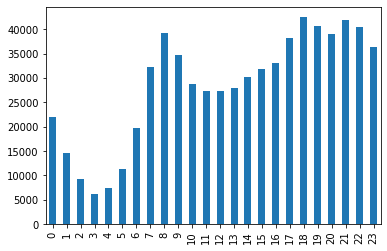

In [16]:
df["hour"].value_counts().sort_index().plot.bar()